# Alkiviadis Kariotis 241735 HW#1 
ITC6010A1 - NATURAL LANGUAGE PROCESSING - Spring Term 2023

## Importing a random text to test my code for the Basic Text Pre-processing

In [1]:
sample_text = """
Hello, my name's John and I'm a student. I've been studying computer science for three years now. I'd like to specialize in artificial intelligence. It's a field that fascinates me.

I can't imagine doing anything else. I won't let anything stand in my way. However, studying isn't always easy. There're many challenges along the way. But I'll overcome them.

I've got a good group of friends. They're also studying computer science. They've been a great support. We often study together. It's more fun that way.

One day, we'd like to start our own tech company. That's our dream. We're working hard to make it a reality. We know it won't be easy, but we're ready for the challenge.

I'm grateful for the opportunities I've had. I know I've got a bright future ahead of me. I'm looking forward to it.

Money isn't everything, but it's definitely important. I'd like to make a good living. But more than that, I want to do something I love. That's the most important thing.
"""

with open('my_sample_text.txt', 'w') as f:
    f.write(sample_text)

## Python code to make the Basic Text Pre-processing

[nltk_data] Downloading package punkt to /Users/alkis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of paragraphs: 6
Number of sentences: 25
Number of words (tokens): 842
Number of distinct words: 110
Word frequency counts: [('.', 91), ("'", 42), ('s', 42), ('I', 40), ('a', 26), (',', 19), ('not', 19), ('have', 18), ('to', 16), ('studying', 15), ('are', 15), ('way', 14), ('my', 11), ('for', 11), ('in', 11), ('that', 11), ('the', 11), ('am', 10), ('been', 10), ('computer', 10), ('science', 10), ('would', 10), ('like', 10), ('anything', 10), ('We', 10), ('me', 8), ('wo', 8), ('easy', 8), ('They', 8), ('it', 8), ('Hello', 6), ('John', 6), ('and', 6), ('student', 6), ('three', 6), ('years', 6), ('now', 6), ('specialize', 6), ('artificial', 6), ('intelligence', 6), ('field', 6), ('fascinates', 6), ('is', 6), ('But', 6), ('got', 6), ('of', 6), ('we', 6), ('our', 6), ('ca', 5), ('imagine', 5), ('doing', 5), ('else', 5), ('let', 5), ('stand', 5), ('However', 5), ('always', 5), ('There', 5), ('many', 5), ('challenges', 5), ('along', 5), ('will', 5), ('overcome', 5), ('them', 5), ('good

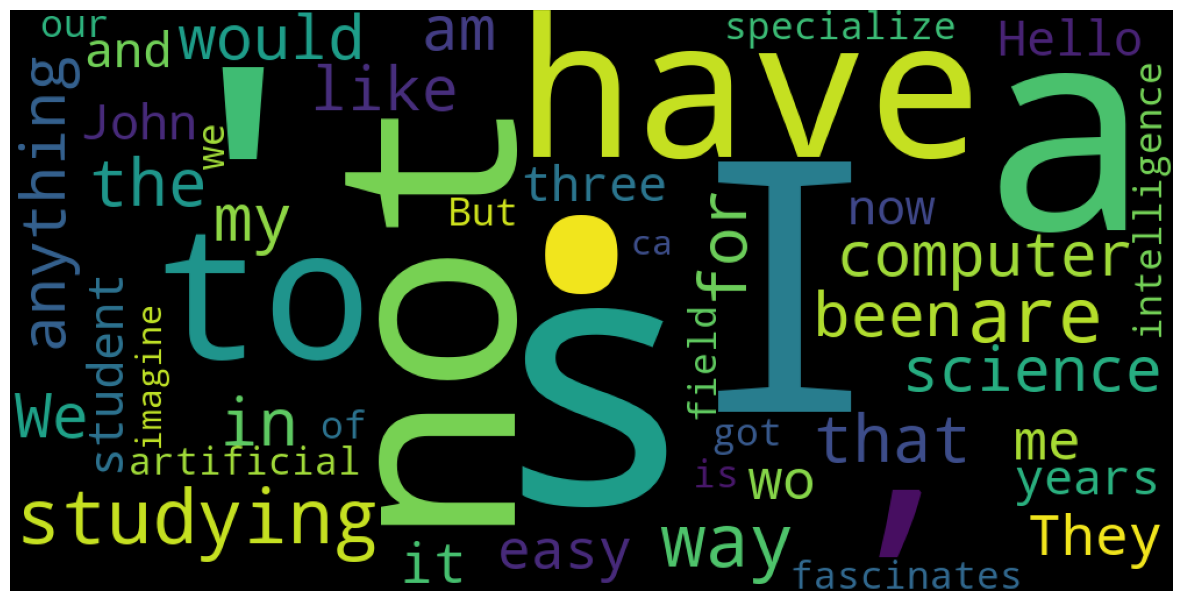

In [2]:
# Import the required modules
import nltk
from collections import Counter
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import io
from fpdf import FPDF
import sys
from PIL import Image


# Define a custom PDF class that extends FPDF
class PDF(FPDF):
    def header(self):
        pass

    def footer(self):
        self.set_y(-15)
        self.cell(0, 10, '', 0, 0, 'C')

# Download resources for sentence tokenization
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Function to process contractions based on rules provided
def process_contractions(word):
    contractions = {
        "n't": "not",
        "'ll": "will",
        "'ve": "have",
        "'d": "would",
        "'re": "are",
        "'s": "'s", # placeholder, will be processed later
        "i'm": "am",
        "I'm": "am",
        "won't": "will",
        "Won't": "Will",
        "can't": "can",
        "Can't": "Can"
    }
    
    for contraction, replacement in contractions.items():
        if word.endswith(contraction):
            return [word[:-len(contraction)], replacement]
    return [word]

# Function to separate punctuations
def process_punctuation(word):
    return re.findall(r"\w+|[^\w\s]", word, re.UNICODE)

# Function to process contractions with 's
def process_s_contraction(word, prev_word):
    singular_pronouns = ["he", "she", "it", "that", "here", "there",
                         "He", "She", "It", "That", "Here", "There"]
    if prev_word in singular_pronouns:
        return [prev_word, "is"]
    else:
        return [prev_word, "'s"]

def main():
    # Load stopwords from a file
    with open("stopwords.rtf", "r") as f:
        stopwords = set(f.read().splitlines())

    # Load sample text from a file
    #Here can change the name of the file that we want to read and the code will bring out results in a new file
    with open("my_sample_text.txt", "r") as f:
        text = f.read()

    # Split text into paragraphs
    paragraphs = text.split('\n\n')
    num_paragraphs = len(paragraphs)

    # Initialize variables for sentences and words
    sentences = []
    words = []

    # Sentence segmentation and word tokenization
    for para in paragraphs:
        sentences.extend(sent_tokenize(para))
        for sent in sentences:
            for i, word in enumerate(sent.split()):
                tokens = process_contractions(word)
                if len(tokens) == 2 and tokens[1] == "'s":
                    tokens = process_s_contraction(*tokens)
                for token in tokens:
                    words.extend(process_punctuation(token))

    # Count the number of sentences, words, and distinct words
    num_sentences = len(sentences)
    num_words = len(words)
    num_distinct_words = len(set(words))

    # Count the frequency of each word
    word_freq = Counter(words)

    # Remove stopwords
    words_no_stopwords = [word for word in words if word not in stopwords]
    

    # Display output
    print("Number of paragraphs:", num_paragraphs)
    print("Number of sentences:", num_sentences)
    print("Number of words (tokens):", num_words)
    print("Number of distinct words:", num_distinct_words)
    print("Word frequency counts:", word_freq.most_common())
    print("Words after removing stopwords:", words_no_stopwords)

    # Get 50 most frequent words
    most_common_words = dict(Counter(words_no_stopwords).most_common(50))

    # Create word cloud
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(most_common_words)

    # Display the word cloud
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    # Save the word cloud to a JPEG file
    wordcloud_jpg_file = "wordcloud.jpg"
    wordcloud.to_file(wordcloud_jpg_file)
    
    # Create PDF object and set parameters
    pdf = PDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Redirect print statements to PDF
    output = io.StringIO()
    sys.stdout = output

    # Display output with spaces
    print("Number of paragraphs:", num_paragraphs, "\n")
    print("Number of sentences:", num_sentences, "\n")
    print("Number of words (tokens):", num_words, "\n")
    print("Number of distinct words:", num_distinct_words, "\n")
    print("Word frequency counts:", word_freq.most_common(), "\n")
    print("Words after removing stopwords:", words_no_stopwords, "\n")

    # Reset print statements
    sys.stdout = sys.__stdout__

    # Get the output from the StringIO object
    output_text = output.getvalue()

    # Write output to PDF
    pdf.multi_cell(0, 10, output_text)

    # Save PDF to file
    pdf.output("output.pdf")

if __name__ == "__main__":
    main()
